# Constrained-Mechanical-Systems-Forward-Dynamic-Simulation-of-Chain-links
Multibody dynamics modeling and numerical methods

## 1 Explicit calculation of the Lagrange multiplier

In [2]:
%matplotlib inline
import time
import numpy as np
import sympy as sp
from scipy.integrate import solve_ivp
from IPython.display import display, Markdown
from Models.models import *
from utils.SolutionDemo import *
sp.init_printing()

### Quadruple Pendulum

In [3]:
m=[1, 1, 1, 1]
l=[1, 1, 1, 1]
Four_Model = ExplictModel(m=m, l=l,close_chain=False)
y = np.append([0.5, 0, 0, 1.5, 0, 0, 2.5, 0, 0, 3.5, 0, 0], np.zeros(3*len(m)))
g = np.tile([0, -9.81, 0], len(m))
f = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### System constrains:

### System governing equations

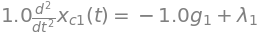

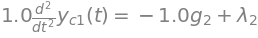

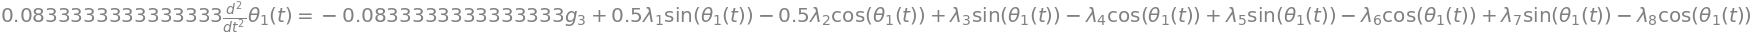

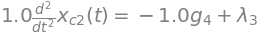

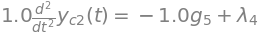

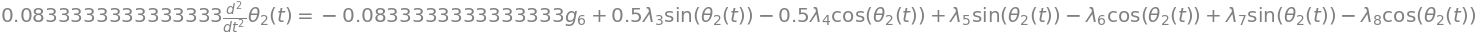

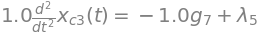

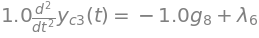

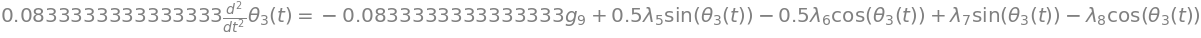

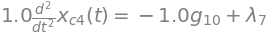

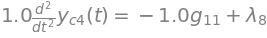

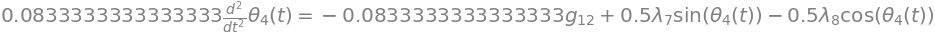

In [4]:
print_constrains(Four_Model)
print_govs(Four_Model, f)

In [5]:
ode = 'DOP853'
sol = solve_ivp(Four_Model.sim, [0, 10], y, method=ode, args=(f, g))
FourPend = SolutionDemo(sol, m, l, rot=None)
print(FourPend.links.shape)

(4, 135, 2, 2)


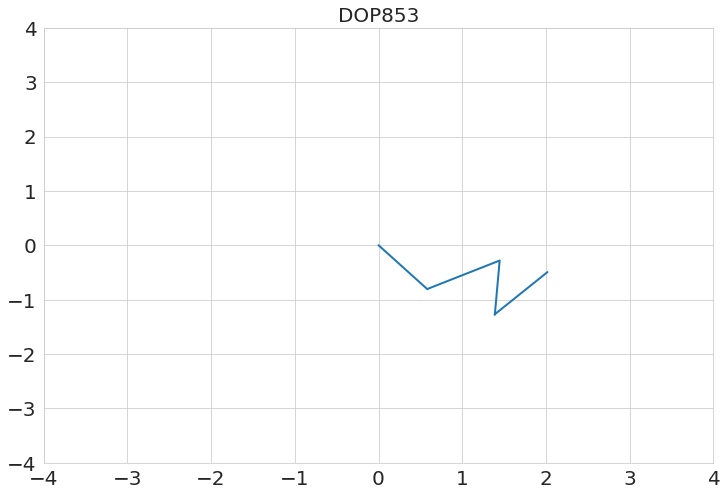

In [6]:
FourPend.play_IPython(ode)

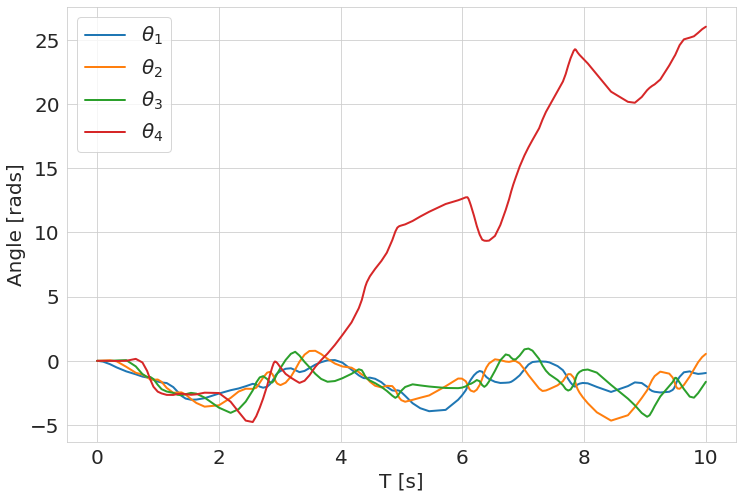

In [7]:
FourPend.plot_angles()